# PRE-PROCESSING OF CODE- the dataset is directly downloaded from uspto website.This dataset contains 62,345 data entries with different classes provided by description.

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
project = pd.read_csv('dataset.csv')

In [4]:
project.head()

,Class,Description
0,25,Cravats
1,25,Espadrilles
2,16,Printed short stories in the field of {indicat...
3,25,Cagoules
4,25,Pinafores


In [5]:
project['Class'].value_counts()

9      5699
16     2891
37     2542
35     2514
7      2367
11     2270
21     2238
28     2177
5      2136
1      2123
41     2052
42     2008
30     1944
10     1891
6      1800
29     1722
20     1654
3      1638
12     1602
25     1443
44     1242
19     1201
36     1171
8      1112
45     1075
40      916
17      889
31      873
39      810
18      808
24      764
2       713
14      664
22      595
26      579
43      561
32      546
38      523
4       518
13      518
15      393
33      324
34      308
23      252
27      242
0        32
B         2
A         1
200       1
Name: Class, dtype: int64

In [6]:
project.isnull().sum()

Class          0
Description    0
dtype: int64

<AxesSubplot:>

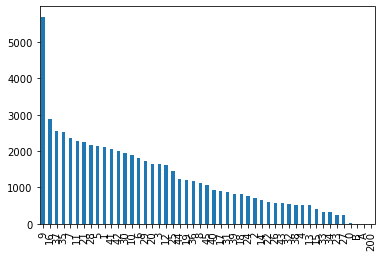

In [7]:
project['Class'].value_counts().plot(kind='bar')

In [8]:
import neattext.functions as nfx

In [9]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [10]:
project['Clean_Text'] = project['Description'].apply(nfx.remove_stopwords)

In [11]:
project['Clean_Text'] = project['Clean_Text'].apply(nfx.remove_punctuations)

In [12]:
project['Clean_Text'] = project['Clean_Text'].apply(nfx.remove_numbers)

In [13]:
project['Clean_Text'] = project['Clean_Text'].apply(nfx.remove_special_characters)

In [14]:
project[['Description','Clean_Text']]

,Description,Clean_Text
0,Cravats,Cravats
1,Espadrilles,Espadrilles
2,Printed short stories in the field of {indicat...,Printed short stories field indicate subject m...
3,Cagoules,Cagoules
4,Pinafores,Pinafores
...,...,...
62339,Cutting fluids for milling,Cutting fluids milling
62340,Cutting oils for millworking,Cutting oils millworking
62341,Cutting oils for milling,Cutting oils milling
62342,Palm oil being biodiesel fuel,Palm oil biodiesel fuel


In [15]:
def preprocess(Clean_Text):
    Clean_Text = Clean_Text.lower() 
    return Clean_Text

In [16]:
import nltk
from nltk.corpus import wordnet 
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [17]:
wl = WordNetLemmatizer()
 
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) 
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] 
    return " ".join(a)

In [18]:
def finalpreprocess(string):
    return lemmatizer(preprocess(string))
project['Clean_Text'] = project['Clean_Text'].apply(lambda x: finalpreprocess(x))
project.head()

,Class,Description,Clean_Text
0,25,Cravats,cravat
1,25,Espadrilles,espadrille
2,16,Printed short stories in the field of {indicat...,print short story field indicate subject matter
3,25,Cagoules,cagoule
4,25,Pinafores,pinafore



# MODELS


In [19]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
Xfeatures = project['Description']
ylabels = project['Class']

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,ylabels,test_size=0.3,random_state = 30)

# NAIVE BAYES-MODEL


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [26]:
nv_model = MultinomialNB()
nv_model.fit(X_train,y_train)

MultinomialNB()

# ACCURACY of naivebayes

In [27]:
nv_model.score(X_test,y_test)

0.7032185628742516

In [28]:
y_pred_for_nv = nv_model.predict(X_test)

In [29]:
print(classification_report(y_test,y_pred_for_nv))

C:\Users\Lahari\anaconda3\anaconda\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lahari\anaconda3\anaconda\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.66      0.73      0.69       673
          10       0.68      0.73      0.70       542
          11       0.70      0.78      0.74       689
          12       0.81      0.79      0.80       474
          13       0.94      0.43      0.59       152
          14       0.87      0.46      0.60       192
          15       0.93      0.31      0.46       121
          16       0.69      0.84      0.75       883
          17       0.72      0.58      0.64       277
          18       0.82      0.43      0.56       241
          19       0.66      0.63      0.64       334
           2       0.90      0.55      0.69       193
          20       0.63      0.60      0.61       496
         200       0.00      0.00      0.00         1
          21       0.64      0.72      0.67       667
          22       0.87      0.25      0.39       181
          23       0.97    

C:\Users\Lahari\anaconda3\anaconda\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
confusion_matrix(y_test,y_pred_for_nv)

array([[   0,    0,    0, ...,    0,    0,    0],
       [   0,  489,    3, ...,    3,    0,   95],
       [   0,    1,  396, ...,    6,    2,   82],
       ...,
       [   0,    5,    0, ...,  537,   10,   37],
       [   0,    2,    7, ...,   24,  247,   12],
       [   0,    9,   14, ...,   31,    1, 1502]], dtype=int64)

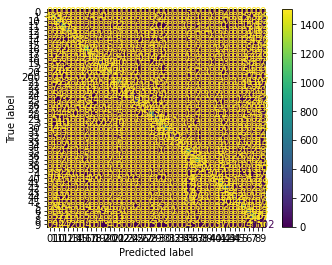

In [31]:
plot_confusion_matrix(nv_model,X_test,y_test)

# SAMPLE-PREDICTION

In [32]:
sample_text = ["sunflower oil"]

In [33]:
vect = cv.transform(sample_text).toarray()

In [34]:
a1 = nv_model.predict(vect)
print("This is the class it belonged to: %d"%(a1))

This is the class it belonged to: 29


# LOGISTIC REGRESSION-MODEL

In [35]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

C:\Users\Lahari\anaconda3\anaconda\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Accuracy of lregression

In [36]:
lr_model.score(X_test,y_test)

0.803464499572284

In [37]:
y_pred_for_lr = lr_model.predict(X_test)

In [38]:
print(classification_report(y_test,y_pred_for_lr))

C:\Users\Lahari\anaconda3\anaconda\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lahari\anaconda3\anaconda\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.64      0.78        11
           1       0.80      0.72      0.76       673
          10       0.82      0.74      0.78       542
          11       0.82      0.79      0.81       689
          12       0.83      0.86      0.85       474
          13       0.86      0.72      0.79       152
          14       0.82      0.73      0.78       192
          15       0.86      0.69      0.76       121
          16       0.84      0.86      0.85       883
          17       0.85      0.76      0.80       277
          18       0.72      0.78      0.75       241
          19       0.79      0.79      0.79       334
           2       0.88      0.76      0.81       193
          20       0.72      0.71      0.72       496
         200       0.00      0.00      0.00         1
          21       0.70      0.74      0.72       667
          22       0.77      0.60      0.67       181
          23       0.94    

C:\Users\Lahari\anaconda3\anaconda\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
confusion_matrix(y_test,y_pred_for_lr)

array([[   7,    0,    0, ...,    0,    0,    0],
       [   0,  486,    1, ...,    1,    0,   99],
       [   0,    0,  400, ...,    5,    1,   58],
       ...,
       [   0,    7,    0, ...,  538,    3,   41],
       [   0,    2,    3, ...,    7,  274,   10],
       [   0,    6,    9, ...,   32,    1, 1516]], dtype=int64)

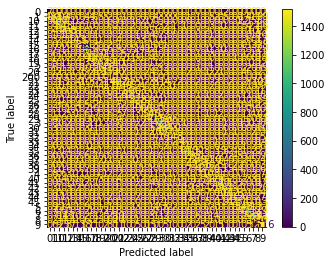

In [40]:
plot_confusion_matrix(lr_model,X_test,y_test)

# SAMPLE-PREDICTION

In [41]:
a2 = lr_model.predict(vect)
print("This is the class it belonged to: %d"%(a2))

This is the class it belonged to: 29


# SVM - MODEL

In [42]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, y_train)  

SVC(kernel='linear', random_state=0)

# Accuracy of svm 

In [43]:
classifier.score(X_test,y_test)

0.8150128314798973

In [44]:
y_pred_for_svm = classifier.predict(X_test)

In [45]:
print(classification_report(y_test,y_pred_for_svm))

C:\Users\Lahari\anaconda3\anaconda\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lahari\anaconda3\anaconda\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.75      0.71      0.73       673
          10       0.82      0.76      0.79       542
          11       0.84      0.81      0.82       689
          12       0.85      0.85      0.85       474
          13       0.87      0.76      0.81       152
          14       0.83      0.81      0.82       192
          15       0.91      0.74      0.81       121
          16       0.86      0.88      0.87       883
          17       0.81      0.83      0.82       277
          18       0.73      0.80      0.76       241
          19       0.77      0.81      0.79       334
           2       0.92      0.87      0.89       193
          20       0.74      0.73      0.73       496
         200       0.00      0.00      0.00         1
          21       0.74      0.74      0.74       667
          22       0.84      0.68      0.75       181
          23       0.93    

C:\Users\Lahari\anaconda3\anaconda\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lahari\anaconda3\anaconda\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lahari\anaconda3\anaconda\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Use

In [46]:
confusion_matrix(y_test,y_pred_for_svm)

array([[  10,    0,    0, ...,    0,    0,    0],
       [   0,  475,    2, ...,    0,  100,    0],
       [   0,    2,  411, ...,    1,   46,    0],
       ...,
       [   0,    2,    2, ...,  282,   12,    0],
       [   0,   10,    9, ...,    0, 1472,    0],
       [   0,    0,    0, ...,    0,    0,    0]], dtype=int64)

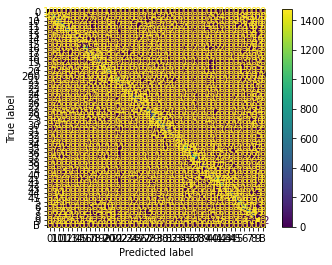

In [47]:
plot_confusion_matrix(classifier,X_test,y_test)

#  SAMPLE-PREDICTION

In [48]:
a3 = classifier.predict(vect)
print("This is the class it belonged to: %d"%(a3))

This is the class it belonged to: 29


# RANDOM FOREST

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
from sklearn.model_selection import RandomizedSearchCV

In [65]:
from scipy.stats import randint

In [66]:
random = RandomForestClassifier()
random.fit(X_train, y_train)

RandomForestClassifier()

# ACCURACY - SVM

In [67]:
random.score(X_test,y_test)

0.7487168520102652

# SAMPLE-PREDICTION

In [68]:
a4 = random.predict(vect)
print("This is the class it belonged to: %d"%(a4))

This is the class it belonged to: 29


In [69]:
y_pred_for_rand= classifier.predict(X_test)

In [70]:
print(classification_report(y_test,y_pred_for_rand))

C:\Users\Lahari\anaconda3\anaconda\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lahari\anaconda3\anaconda\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.75      0.71      0.73       673
          10       0.82      0.76      0.79       542
          11       0.84      0.81      0.82       689
          12       0.85      0.85      0.85       474
          13       0.87      0.76      0.81       152
          14       0.83      0.81      0.82       192
          15       0.91      0.74      0.81       121
          16       0.86      0.88      0.87       883
          17       0.81      0.83      0.82       277
          18       0.73      0.80      0.76       241
          19       0.77      0.81      0.79       334
           2       0.92      0.87      0.89       193
          20       0.74      0.73      0.73       496
         200       0.00      0.00      0.00         1
          21       0.74      0.74      0.74       667
          22       0.84      0.68      0.75       181
          23       0.93    

C:\Users\Lahari\anaconda3\anaconda\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lahari\anaconda3\anaconda\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lahari\anaconda3\anaconda\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Use

In [71]:
confusion_matrix(y_test,y_pred_for_rand)

array([[  10,    0,    0, ...,    0,    0,    0],
       [   0,  475,    2, ...,    0,  100,    0],
       [   0,    2,  411, ...,    1,   46,    0],
       ...,
       [   0,    2,    2, ...,  282,   12,    0],
       [   0,   10,    9, ...,    0, 1472,    0],
       [   0,    0,    0, ...,    0,    0,    0]], dtype=int64)

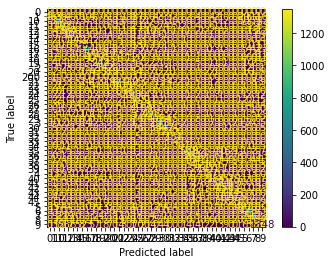

In [77]:
plot_confusion_matrix(random,X_test,y_test)

In [82]:
import joblib

In [83]:
joblib.dump(classifier,'svm')

['svm']

In [84]:
classifier = joblib.load('svm')